
# "Оценка результатов A/B - тестирования внедрения нового интерфейса  интернет-магазина BitMotion Kit"


Интернет-магазин `BitMotion Kit` специализируется на продаже геймифицированных товаров для активного образа жизни. Чтобы повысить лояльность пользователей и увеличить продажи, команда решила обновить интерфейс своего сайта. Перед внедрением новой версии разработчики провели A/B-тестирование, сравнив старое оформление с новым вариантом интерфейса.

Новая версия должна была упростить навигацию и повысить удобство совершения покупок. Пользователям, участвовавшим в тестировании, случайно назначалась либо старая, либо новая версия сайта. Теперь необходимо оценить, насколько эффективен новый интерфейс и действительно ли он увеличивает конверсию.

## Цель проекта


проведение А/В - тестирования  нового интерфейса интернет-магазина BitMotion Kit и оценка результатов  его влияние на конверсию пользователей.


## Задачи проекта:

- исследование данных, используемых для оценки результатов тестирования;
- оценка качества данных в контрольной и тестовой выборке;
- использование статистических тестов для оценки конверсии;
- анализ результатов тестирования и интерпретация результатов тестов и формирование выводов о влиянии нового интерфейса на конверсию.
- формулирование выводов и рекомендаций.


## Содержимое проекта:


**1. Загрузка данных и знакомство с ними:**
- проводится предварительное знакомство с данными;
- провести исследование данных и необходимую обработку.

**2. Оценка  таблице ab_test_participants корректность проведения теста по  таблице ab_test_participants:**
- исследование выборок контрольной ( А) и тестовой (В) группы и определение соответствия их техническому задания, а именно - необходимы данные для теста interface_eu_test;
- оценка наличия пересечений между контрольной и тестовой группы;
- исследование качества распределения данных по категориальным переменным.

**3. Анализ пользователей участвующих в тестировании из таблицы ab_test_events:**
- расчет горизонта анализа и формирование выборки только из данных за первые 7 дней использования интернет – магазина после регистрации;
- достаточность выборки для получения статистически значимых результатов A/B-теста;
- расчет и предварительное расчет изменения количества пользователей, совершивших покупку со старым и новым интерфейсом и оценка конверсии;

**4. Проведение оценки результатов A/B-тестирования:**
- реализация теста Z – пропорций для оценки гипотезы;
- интерпретация результатов и выводы по результатам проведенного исследования.


## Описание данных проекта 


Таблица ` ab_test_participants` - таблица с информацией об участниках тестов:
- `user_id` — идентификатор пользователя;
- `group` — группа пользователя А и В;
- `ab_test` — название теста;
- `device` — устройство, с которого происходила регистрация.

Таблица ` ab_test_events` - архив с одним csv-файлом, в котором собраны события 2020 года:
 - `user_id` — идентификатор пользователя;
 - `event_dt` — дата и время события;
 - `event_name` — тип события;
 - `details` — дополнительные данные о событии.
 
Дополнительная информация по столбцу `details`

Числовые значения:
- `registration (регистрация)` — стоимость привлечения клиента;
- `purchase (покупка)` — стоимость покупки.


## 1. Загрузите данные, оцените их целостность.


In [1]:
import math
from math import ceil

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import numpy as np
import pandas as pd
import seaborn as sns


from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kstest
import statsmodels.stats.api as sms
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportions_ztest

In [2]:
try: 
    participants = pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/Итоговый_проект_3/ab_test_participants.csv')
    events = pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/Итоговый_проект_3/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)
except FileNotFoundError:
    participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
    events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [3]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [4]:
participants.head(10)

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
7,0031F1B5E9FBF708,A,interface_eu_test,Android
8,003346BB64227D0C,B,interface_eu_test,Android
9,00341D8401F0F665,A,recommender_system_test,iPhone


In [5]:
duplicates_participants = participants.duplicated().sum()
print(f"Количество явных дубликатов: {duplicates_participants}")

Количество явных дубликатов: 0


Датасет `participants` состоит из `4 колонок и 14525 строки`, здесь отражены данные об участниках тестов.

В данных нет пропусков, тип данных соответствует информации отраженной в датасете, поэтому обрабатывать не надо, также в данных нет явных дубликатов.


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [7]:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [8]:
duplicates_participants = events.duplicated().sum()
print(f"Количество явных дубликатов: {duplicates_participants}")

Количество явных дубликатов: 36318


Датасет `events` состоит из `4 колонок и 14525 строки`, здесь отражены данные о событиях в рамках проводимого тестирования.

В датасете есть пропуск в `details`, где отражается дополнительная информация, которая была получена в рамках тестирования. Здесь отражается такая информация как стоимость привлечения, код региона и так далее. Данные пропуски могут быть результатом ошибочного формирования данных и так далее. Данные пропуски мы оставим как есть, так как мы не никак заполнить никаким образом.

В датасете также есть дубликаты, однако мы их удалять не будем, так как трудно однозначно установить, являются ли они дубликатами из-за большого числа пропусков.

## 2. Проведение оценки корректности проведенного теста

### 2.1 Исследование данных о пользователях, участвующих в тестировании

Необходимо сделать следящее:
   - оценить соответствие требованиям технического задания пользователей;
   - проанализировать равномерность распределения пользователей по группам теста,
   - определить наличие или отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

Посмотрим какие тесты представлены в  `ab_test_participants` для дальнейшего исследования.

In [9]:
participants['ab_test'].unique()

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

Мы проводим исследование по изменению интерфейса интернет магазина, следовательно, в исследовании должны участвовать только данные для `interface_eu_test` и поэтому сформируем необходимый датасет с данными.

Однако перед тем, как провести исследование данных участников `interface_eu_test` стоит исследовать данные в обоих тестах и выяснить есть ли пересечение между участниками двух тестирований. Участие одних и тех же пользователей в нескольких A/B-тестах может привести к серьезным проблемам с интерпретацией результатов.

In [10]:
interface_test= participants[participants['ab_test']=='interface_eu_test']
recommender_test= participants[participants['ab_test']=='recommender_system_test']

In [11]:
# Находим пересечение множеств пользователей
intersection_test = set(interface_test['user_id'].unique()) & set(recommender_test['user_id'].unique())

# Подсчитываем количество пересечений
number_of_intersections = len(intersection_test)

# Выводим результат
if number_of_intersections > 0:
    print(f"Количество пользователей, участвующих в обоих тестах: {number_of_intersections}")
else:
    print("Никто не участвует одновременно в двух тестах.")

Количество пользователей, участвующих в обоих тестах: 887


В ходе предварительного анализа данных установлено, что в тестах встречаются `887 одинаковых пользователей`, присутствующих одновременно в контрольной и тестовой группах. Такое наложение выборок создает риск искажения результатов, так как нарушает условие независимости данных между группами.

Удаляем данные этих пользователей из обоих наборов данных, чтобы обеспечить корректность и независимость выборок. Это предотвратит смещение результатов и даст более точные выводы по A/B-тестированию.


In [12]:
# Удаляем пересекающихся пользователей
interface_participants = interface_test[~interface_test['user_id'].isin(intersection_test)].reset_index(drop=True)
recommender_participants= recommender_test[~recommender_test['user_id'].isin(intersection_test)].reset_index(drop=True)

In [13]:
# Проверяем, что пересечение стало пустым
new_intersection = set(interface_participants['user_id'].unique()) & set(recommender_participants['user_id'].unique())
# Выводим результат
if len(new_intersection) > 0:
    print(f"Количество пользователей, участвующих в обоих тестах: {len(new_intersection)}")
else:
    print("Никто не участвует одновременно в двух тестах.")

Никто не участвует одновременно в двух тестах.


In [14]:
interface_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9963 entries, 0 to 9962
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  9963 non-null   object
 1   group    9963 non-null   object
 2   ab_test  9963 non-null   object
 3   device   9963 non-null   object
dtypes: object(4)
memory usage: 311.5+ KB


Далее нам необходимо исследователь качество представленных данных в 2х группа А (контрольная) и B (новый интерфейс) уже данных конкретного нашего теста из `interface_participants_cleaned`. Разделим данные на 2 выборки и исследуем равномерность распределения пользователей по группам.

In [15]:
#выделим участников контрольной test_participants А
group_a = interface_participants[interface_participants['group']=='A'].reset_index(drop = True)
print(f'Размер группы А: {group_a.shape[0]}')

Размер группы А: 4952


In [16]:
#выделим участников эксперементальной группы В
group_b = interface_participants[interface_participants['group']=='B'].reset_index()
print(f'Размер группы B: {group_b.shape[0]}')

Размер группы B: 5011


In [17]:
group_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    5011 non-null   int64 
 1   user_id  5011 non-null   object
 2   group    5011 non-null   object
 3   ab_test  5011 non-null   object
 4   device   5011 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.9+ KB


In [18]:
#посчитаем количество уникальных пользователей в обеих группах
unique_group_a = group_a['user_id'].nunique()
unique_group_b = group_b['user_id'].nunique()

print(f'Количество уникальных пользователей А = {unique_group_a} и B = {unique_group_b}')


Количество уникальных пользователей А = 4952 и B = 5011


In [19]:
user_a_set = set(group_a['user_id'].unique())
user_b_set = set(group_b['user_id'].unique())

intersection_users = user_a_set.intersection(user_b_set)

if intersection_users:
    print(f"Пользователи, попавшие в обе группы: {list(intersection_users)}")
else:
    print("Никаких пользователей, встречающихся в обеих группах, не обнаружено.")


Никаких пользователей, встречающихся в обеих группах, не обнаружено.


Оценим процентную разницу между выборками А и В для того чтобы понимать уровень различия.

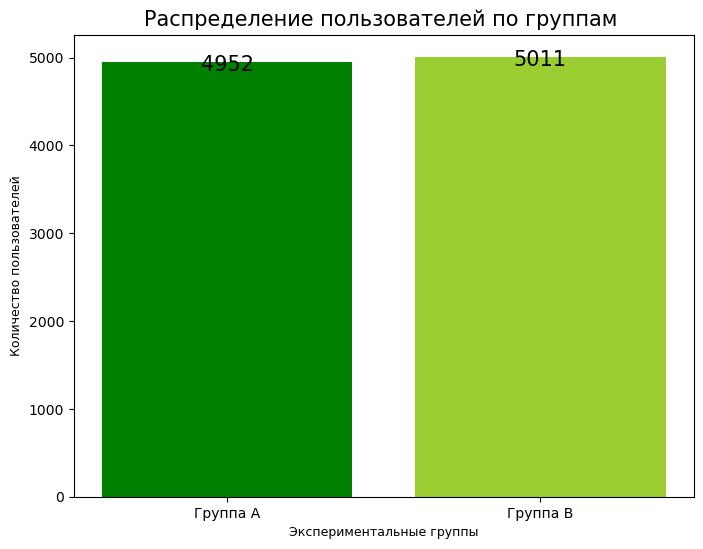

In [20]:
labels = ['Группа А', 'Группа B']
counts = [unique_group_a,unique_group_b]
colors = ['green', 'yellowgreen']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)

for i, count in enumerate(counts):
    plt.text(i, count + 80, str(count), ha='center', va='top', fontsize=15)
plt.title('Распределение пользователей по группам ',fontsize=15)
plt.xlabel("Экспериментальные группы",fontsize=9)
plt.ylabel("Количество пользователей",fontsize=9)
plt.show()

По предварительным результатам мы видим, что выборки соизмеримы и имеют практически одинаковый размер, поэтому далее стоит провести исследование равномерности распределения данных по `device`.

In [21]:
group_device = pd.pivot_table(interface_participants, index = ['group','device'], values = 'user_id', aggfunc = 'nunique').reset_index()

In [22]:
# расчитаем долю кажого девайса в группе.
group_device['share'] = group_device.groupby(['group'])['user_id'].transform(lambda x: x / x.sum())
group_device

,group,device,user_id,share
0,A,Android,2264,0.457189
1,A,Mac,515,0.103998
2,A,PC,1223,0.246971
3,A,iPhone,950,0.191842
4,B,Android,2218,0.442626
5,B,Mac,511,0.101976
6,B,PC,1302,0.259828
7,B,iPhone,980,0.195570


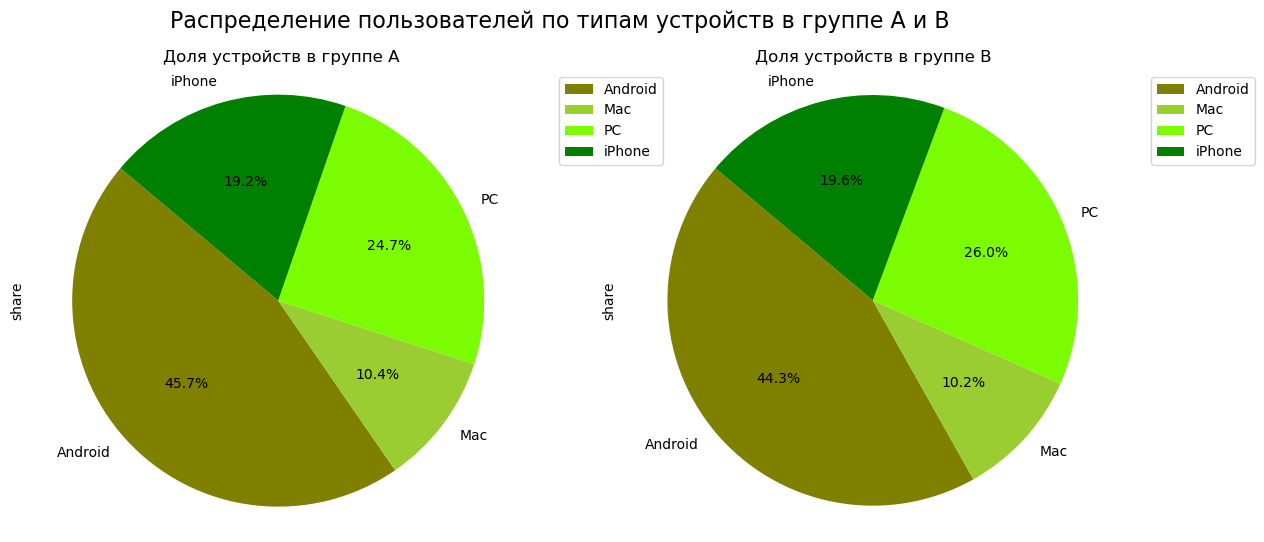

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Список цветов для каждого устройства
color = ['olive','yellowgreen', 'lawngreen','g']

# формируем описание для груговой диаграммы отображающей распределение пользователей по типам устройств в группах
for idx,(name, data) in enumerate(group_device.groupby('group')):
    ax = axes[idx]
    data.plot(kind = 'pie', y = 'share', labels = data['device'], autopct='%1.1f%%',startangle=140,ax=ax, colors = color,normalize=False)
    ax.axis('equal')                             
    ax.set_title(f'Доля устройств в группе {name}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
fig.suptitle('Распределение пользователей по типам устройств в группе A и B', fontsize=16)
plt.show()

В данных представлено 4 типа устройств `iPhone`, `Android`, `PC` и `MAC`, при этом как можно заметить, что для обеих групп характерно практически равномерное распределение пользователей между устройствами, есть незначительные отличия, но они не превышают `1,4%`, то есть можно говорить, что по такой категориальной переменной как тип устройства пользователи распределены равномерно.

### Промежуточный вывод:

- нам представлены данные для оценки изменений интерфейса интернет- магазина, соответственно нами были выбраны данные с параметром `interface_eu_test`;
- были использованы  2 выборки А (контрольная группа) и В (Экспериментальная группа), которые имеют практически одинаковый размер `4952` и `5011` уникальных  пользователей, при этом разница в размере выборки не превышает 1,2%, а следовательно выборки соизмеримы;
- оценка равномерности распределения данных показала, что данные в группах по категориальному признаку `device` распределены практически идентично, есть небольшая погрешность, которой можно пренебречь;
- после обработки мы определили, что пересечений в выборках нет.
  
Таким образом, мы имеем 2 независимые репрезентативные выборки для проведения А/В - тестирования целесообразности внесения изменений в интерфейс.

### 2.2  Анализ данных о пользовательской активности 

In [24]:
test_events = pd.merge(interface_participants,events,how='inner', on = 'user_id')

In [25]:
test_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73815 entries, 0 to 73814
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     73815 non-null  object        
 1   group       73815 non-null  object        
 2   ab_test     73815 non-null  object        
 3   device      73815 non-null  object        
 4   event_dt    73815 non-null  datetime64[ns]
 5   event_name  73815 non-null  object        
 6   details     19450 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 4.5+ MB


In [26]:
test_events.head(10)

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN
5,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:36,product_page,NaN
6,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:37,product_page,NaN
7,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-10 15:23:08,product_page,NaN
8,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-10 15:23:09,product_cart,NaN
9,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-15 12:50:07,product_cart,NaN


Определим горизонт анализа: рассчитаем время (лайфтайм) совершения события пользователем после регистрации и оставим только те события, которые были выполнены в течение первых семи дней с момента регистрации.

In [27]:
# Получение минимальных дат регистрации для каждого user_id
registration_dates = test_events.groupby('user_id')['event_dt'].transform('min')

# Вычисление разницы во времени между событием и регистрацией
time_diff = test_events['event_dt'] - registration_dates

# Преобразование разницы во времени в дни
days_since_registration = time_diff.dt.days

# Добавление нового столбца с количеством дней после регистрации
test_events['days_since_registration'] = days_since_registration

# Фильтрация событий, произошедших в течение первых семи дней
test_events_days = test_events[test_events['days_since_registration'] <= 7].reset_index(drop=True)



In [28]:
# Сортировка событий по user_id и event_dt
sorted_test_events = test_events.sort_values(['user_id', 'event_dt'])

# Создание маски для нахождения событий "Регистрация"
is_registration_event = sorted_test_events['event_name'] == 'registration'

# Проверка, что регистрация идет первой для каждого пользователя
first_event_by_user = sorted_test_events.groupby('user_id').head(1)

# Маска для тех пользователей, у которых первым событием не является регистрация
problem_users = first_event_by_user['event_name'] != 'registration'

if problem_users.any():
    print("Есть пользователи, у которых первым событием не является регистрация:")
    print(first_event_by_user[problem_users].head())
else:
    print("Все пользователи зарегистрировались первыми.")

Есть пользователи, у которых первым событием не является регистрация:
             user_id group            ab_test   device            event_dt  \
17  002412F1EB3F6E38     B  interface_eu_test      Mac 2020-12-09 09:36:50   
24  002540BE89C930FB     B  interface_eu_test  Android 2020-12-08 18:06:07   
34  0031F1B5E9FBF708     A  interface_eu_test  Android 2020-12-14 00:47:10   
39  003346BB64227D0C     B  interface_eu_test  Android 2020-12-17 05:24:23   
93  0074BEB9856FBC87     A  interface_eu_test       PC 2020-12-13 13:02:51   

   event_name details  days_since_registration  
17      login     NaN                        0  
24      login     NaN                        0  
34      login     NaN                        0  
39      login     NaN                        0  
93      login     NaN                        0  


Пользователей, у которых первым событием указана логин (`login`), а не регистрация (`registration`), стоит воспринимать как вполне ожидаемое явление. Объясняется это особенностями системы сбора данных:

- когда пользователь впервые открывает сайт или приложение, система автоматически записывает вход в аккаунт как первое событие;
- фактическая регистрация (создание аккаунта) может произойти позже, иногда спустя некоторое время после входа;

Такое поведение встречается довольно часто в системах аналитики, где учет событий начинается с момента открытия сайта или приложения, а не с непосредственного акта регистрации.

Дополнительно оценим достаточность выборок получения статистически значимых результатов A/B-теста. Параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.


Добавим, что по  предварительной оценке при внедрении нового интерфейса конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта, это означает что показатель `mde` составит `3%`.

In [29]:
# Параметры
baseline_conversion_rate = 0.3  # базовый показатель конверсии
mde = 0.03  # минимальное увеличение конверсии (3 процентных пункта)
alpha = 0.05  # уровень значимости (95% достоверность)
power = 0.8  # мощность теста (80%)

# Расчет размера выборки
effect_size = sms.proportion_effectsize(baseline_conversion_rate, baseline_conversion_rate + mde)
sample_size = sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha,ratio = 1)

# Округление до ближайшего большего целого числа
sample_size_per_group = int(ceil(sample_size))

print(f"Требуется минимум {sample_size_per_group} участников в каждой группе.")

Требуется минимум 3762 участников в каждой группе.


Размер используемых выборок превышаете минимальный требуемый объем, соответственно данных достаточно для проведения тестирования внедрения нового интерфейса.

Рассчитаем следующие метрики для каждой группы:
- количество посетителей, сделавших покупку;
- общее количество посетителей.

In [30]:
##  расчет количество посетителей, сделавших покупку, и общее количество посетителей  для А

unique_registrations_a = test_events_days[(test_events_days['group'] == 'A')& (test_events_days['event_name'] == 'registration')]['user_id'].nunique()
unique_purchases_a = test_events_days[(test_events_days['group'] == 'A')& (test_events_days['event_name'] == 'purchase')]['user_id'].nunique()

# Вывод результата
print(f'Количество  пользователей сделавших покупку в группе A: {unique_purchases_a}')
print(f'Количество зарегистрированных пользователей в группе A: {unique_registrations_a}')


##  расчет количество посетителей, сделавших покупку, и общее количество посетителей  для B

unique_registrations_b = test_events_days[(test_events_days['group'] == 'B')& (test_events_days['event_name'] == 'registration')]['user_id'].nunique()
unique_purchases_b= test_events_days[(test_events_days['group'] == 'B')& (test_events_days['event_name'] == 'purchase')]['user_id'].nunique()

# Вывод результата
print('-------------------------------------------------------------------')
print(f'Количество  пользователей сделавших покупку в группе B: {unique_purchases_b}')
print(f'Количество зарегистрированных пользователей в группе B: {unique_registrations_b}')


Количество  пользователей сделавших покупку в группе A: 1435
Количество зарегистрированных пользователей в группе A: 4952
-------------------------------------------------------------------
Количество  пользователей сделавших покупку в группе B: 1562
Количество зарегистрированных пользователей в группе B: 5011


Проведем предварительную оценку  изменений пользовательской активности в тестовой группе по сравнению с контрольной.

In [31]:
# конверсия группы А
conversion_rate_a = 100*unique_purchases_a/unique_registrations_a
print(f'Конверсия в группе А {conversion_rate_a:.2f}%')

Конверсия в группе А 28.98%


In [32]:
# конверсия группы B
conversion_rate_b = 100*unique_purchases_b/unique_registrations_b
print(f'Конверсия в группе B {conversion_rate_b:.2f}%')

Конверсия в группе B 31.17%


In [33]:
relative_difference = ((conversion_rate_b/conversion_rate_a)-1)*100
print(f'Относительное изменение между конверсиями А и B = {relative_difference:.2f} пп')

Относительное изменение между конверсиями А и B = 7.57 пп


По результатам предварительного расчета мы видим, что конверсия увеличилась  с 28,98 % до 31.17% в тестовой группе, что соотвествует 7,57 процентных пункта в рамках относительного изменения.Это может свидетельствовать о том, что изменения в интерфейсе могли оказать положительное воздействие на улучшение конверсии. Однако, для получения более точного результата стоит провести с помозью статестического теста для оценки гипотезы данного тестирования.

По предварительным данным, изменение интерфейса интернет-магазина `BitMotion Kit` оказывает положительный эффект на конверсию пользователей:

- Конверсия в контрольной группе (A): 28,98%
- Конверсия в экспериментальной группе (B): 31,17%
- Изменение составило +7,57 процентных пункта (относительно контрольной группы), что подразумевает возможный положительный эффект от внедрения нового интерфейса.

Однако для того чтобы с большей уверенностью утверждать о значимом увеличении комиссии необходимо для уверенности в результатах провести статистический тест (например, Z-тест для пропорций), чтобы удостовериться, что полученный рост конверсии не случаен и носит статистически значимый характер.

Следовательно, следующим этапом анализа станет применение соответствующего статистического инструмента для проверки гипотезы и составления окончательных выводов.


## 3. Оценка результатов   проведенного A/B-тестирования

Гипотеза данного тестирования:Упрощение интерфейса увеличит конверсию зарегистрированных пользователей в покупатели как минимум на три процентных пункта в течение семи дней после регистрации.

Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- **Нулевая гипотеза (H₀):** Уровень конверсии интернет-магазина останется неизменным или снизится после внедрения нового интерфейса;

- **Альтернативная гипотеза (H₁):** Уровень конверсии интернет-магазина увеличится после внедрения нового интерфейса, и это увеличение будет статистически значимым.

Конверсия является долевым показателем, поэтому целесообразно в рамках  оценки результатов тестирования использовать такой стат.тест как  `Z- пропорции`.

Перед тем как приступить к проведению статистического теста Z- пропорции следует провести доп. исследование данных о достаточности их количества.

In [34]:
## посчитаем размер группы А
n_a = unique_registrations_a

## посчитаем размер группы B
n_b = unique_registrations_b

##посчитаем количество успешных исходов для группы А
m_a = unique_purchases_a

##посчитаем количество успешных исходов для группы B
m_b = unique_purchases_b

## считаем конверсию
p_a, p_b = m_a/n_a, m_b/n_b

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных не выполняется!')

Предпосылка о достаточном количестве данных выполняется!


Нам удалось определить, что данных для реализации статистического тест Z - пропорций достаточно данных, поэтому,  далее проведем расчет показателей.

In [35]:
alpha = .05

stat_ztest, p_value_ztest = proportions_ztest([m_a,m_b],
                                              [n_a,n_b],
                                              alternative='smaller')
print(f'p-value теста Z-пропорции = {round(p_value_ztest,5)}')

if p_value_ztest>alpha:
    print('Нулевую гипотезу не отвергаем.')
    print()
    print('Интерпретация: использование нового интерфейса не увеличит  конверсию покупок')
else:
    print('Принимаем альтернативную гипотезу.')
    print('Интерпретация: Уровень конверсии интернет - магазина вырастет с внедрением нового интерфейса сайта минимум на 3 пп.')

p-value теста Z-пропорции = 0.0085
Принимаем альтернативную гипотезу.
Интерпретация: Уровень конверсии интернет - магазина вырастет с внедрением нового интерфейса сайта минимум на 3 пп.


### Общие выводы и результаты по проекту

-  использованы таблицы `ab_test_participants` и ` ab_test_events` где была отображена информация об участниках тестов и о событиях в 2020 году связанную с тестами;
- `ab_test_participants` представлены данные по двум тестам: `interface_eu_test` и `recommender_system_test`;
- был обнаружен "перекос" в данных, а именно в обеих выборках присутсвует `887` пользователей. Такие пересечения исключены из анализа, чтобы минимизировать риски смещения результатов;
- в тесте `interface_eu_test` задействовали `4952` пользователя в группе A (`контрольная`) и `5011` пользователя в группе B (`тестовая`);
- анализ выборок `interface_eu_test` показал, что выборка А и В являются независимыми, имеют равномерное распределение по категориальной переменной и соответственно их использование целесообразно в АВ-тестировании интерфейса;
-   конверсия в группе А составила `28,98%`, в группе В `31,17%`, то есть   внедрение нового интерфейса привело к росту конверсии на `7,57 пп`;
- для оценки значимости использовался Z-тест для пропорций, подходящий для анализа долевых метрик;
- для оценки статистической значимости изменений ключевой метрики было использован тест Z – пропорции, так как он позволяет оценивать долевые метрики;
- по результатам теста было выявлено, что `p-value = 0.0085` при `alpha = 0.05`, то есть изменения имеют статистическую значимость что изменение интерфейса сайта интернет – магазина приведет к росту конверсии покупки, следовательно, мы подтвердили установленную гипотезу.

Внедрение нового интерфейса в интернет-магазине `BitMotion Kit` действительно увеличивает конверсию пользователей на не менее 3 процентных пункта, что подтверждено результатами `A/B-теста`. Введение обновлённого интерфейса экономически выгодно и рекомендуется к применению.